In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

In [2]:
from placefield_detection.process_session import process_session

In [3]:
pathSession = Path("../../../../data/845ad/Session10")

pathBehavior = pathSession / "aligned_behavior.pkl"
pathActivity = [
    file
    for file in pathSession.iterdir()
    if (
        file.stem.startswith("results_CaImAn")
        and not "compare" in file.stem
        and "redetected" in file.stem
    )
][0]

In [4]:
from placefield_detection.utils import prepare_behavior_from_file
from caiman.utils.utils import load_dict_from_hdf5

nbin = 40
behavior = prepare_behavior_from_file(
    pathBehavior,
    nbin=nbin,
    f=15.0,
    only_active=True,
    calculate_performance=True,
    # plt_trials=True,
    plt_bool=True,
)

ld = load_dict_from_hdf5(pathActivity)
neuron_activity = ld["S"][:]

2025-07-17 16:16:41.894650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752761801.914546   27380 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752761801.921052   27380 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from matplotlib import pyplot as plt
from placefield_detection.utils import prepare_activity, plot_activity
from ipywidgets import widgets, HBox, VBox, Output
import numpy as np

output = Output()
neuron_idx = 20  # initial neuron index


def update_plot(change=None):
    output.clear_output(wait=True)
    prepared = prepare_activity(neuron_activity[neuron_idx, :], behavior)
    with output:
        print(f"neuron={neuron_idx}")
        plot_activity(prepared, behavior)


def forward(b):
    global neuron_idx
    if neuron_idx < np.inf:
        neuron_idx += 1
        update_plot()


def backward(b):
    global neuron_idx
    if neuron_idx > 0:
        neuron_idx -= 1
        update_plot()


btn_forward = widgets.Button(description="Forward")
btn_backward = widgets.Button(description="Backward")
btn_forward.on_click(forward)
btn_backward.on_click(backward)

display(HBox([btn_backward, btn_forward]))
display(output)
update_plot()

# for neuron in range(20,30):
# 	prepared_activity = prepare_activity(neuron_activity[neuron,:], behavior)
# 	print(f"{neuron=}")
# 	plot_activity(prepared_activity, behavior)

Output()

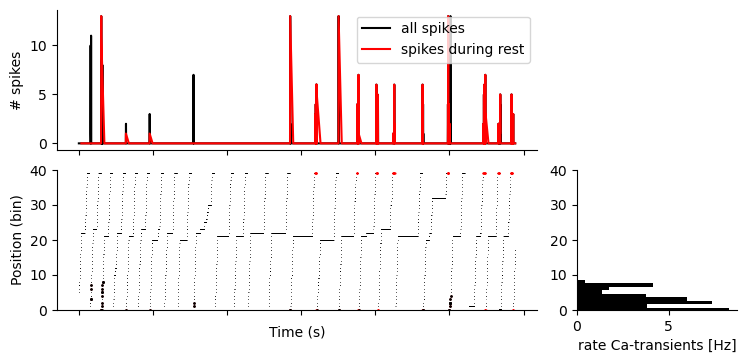

In [10]:
from placefield_detection.process_single_neuron import process_single_neuron
from placefield_detection.utils import plot_activity

neuron = 4
process_neuron = process_single_neuron(
    behavior,
    mode_place_cell_detection=["peak", "information"],
    mode_place_field_detection=["bayesian","threshold"],
)
process_neuron.run_preprocessing(neuron_activity[neuron, :])
plot_activity(process_neuron.prepared_activity, behavior)

In [8]:
# process_neuron.run_detection(neuron_activity[11, :])
process_neuron.run_detection(
    neuron_activity[neuron, :], limit_execution_time=900, show_status=True
)


f=0

Z=-2391.5(0.00%) | Like=-2354.90..-2340.72 [-2356.5059..-2351.5764] | it/evals=3326/163739 eff=1.9849% N=22  
f=1

Z=-1704.0(99.00%) | Like=-1662.13..-1660.39 [-1662.1324..-1662.1323]*| it/evals=8633/520211 eff=1.0190% N=185 N=185  
f=2

Model comparison finished after 909.70s with evidences: 	 f=0 , logz=-2390.26	 f=1 , logz=-1703.99	 f=2 *, logz=-1497.48


{'firingstats': {'firing_rate': 3.0003337412392925,
  'map_rates': array([ 9.32432432, 20.49295775, 15.76271186, 18.75      , 14.19642857,
         11.72727273, 12.29508197, 14.13043478,  8.30769231,  6.8852459 ,
         10.17241379,  2.67123288,  5.47297297,  7.25      ,  1.34328358,
          3.75      ,  3.54545455,  4.28571429,  1.42857143,  0.        ,
          8.01136364,  4.78915663,  5.10638298,  0.14018692,  0.        ,
          0.52325581,  0.23076923,  0.22058824,  0.50847458,  0.        ,
          0.77922078,  1.21621622,  0.19480519,  0.        ,  0.        ,
          1.2295082 ,  1.55172414,  3.67924528,  1.19047619,  0.        ]),
  'map_trial_rates': array([[         nan,          nan,          nan,          nan,
                   nan,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.  

In [23]:
process_neuron.results["threshold"]

{}

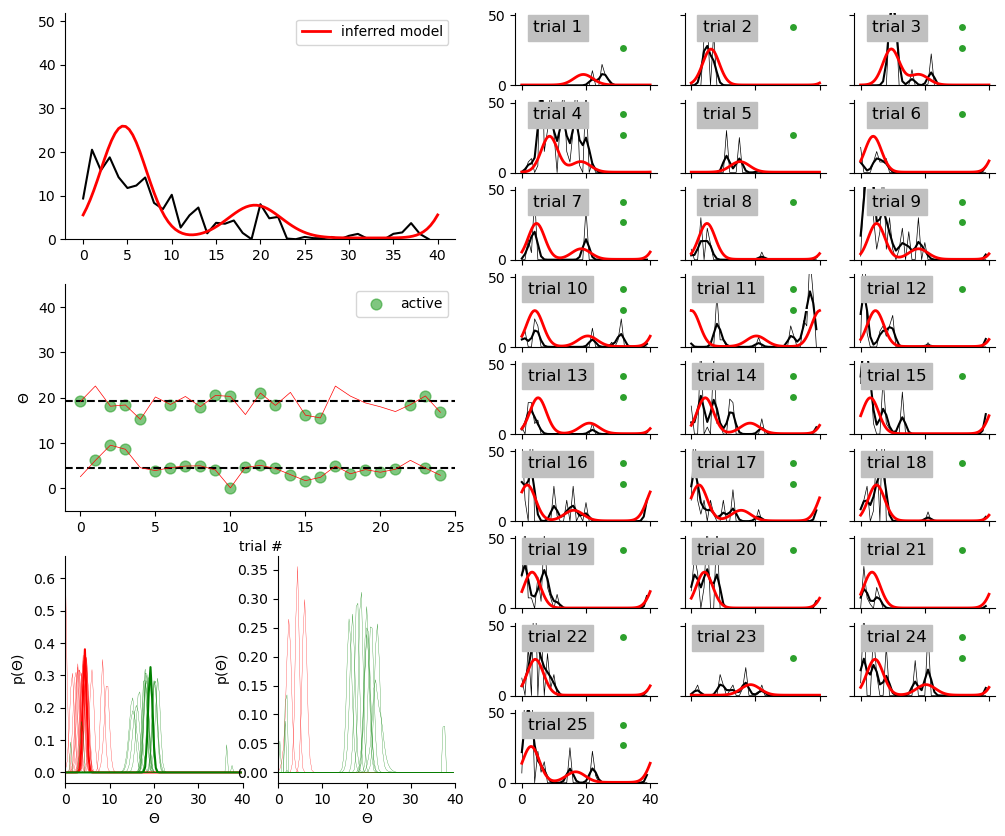

In [9]:
from placefield_detection.analyze_results import display_results
display_results(process_neuron.results)

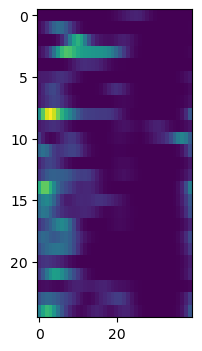

In [18]:
from placefield_detection.utils import gauss_smooth
fig = plt.figure(figsize=(2,4))
ax = fig.add_subplot(111)
ax.imshow(gauss_smooth(process_neuron.results["firingstats"]["map_trial_rates"],(0,2)),aspect='auto')

In [7]:
from placefield_detection.alternative_detection_methods import thresholding_method
neuron=3
pn = process_single_neuron(
    behavior,
    mode_place_cell_detection=["peak", "information"],
    mode_place_field_detection=["threshold"],
)
pn.run_preprocessing(neuron_activity[neuron, :])
plot_activity(pn.prepared_activity, behavior)

# pn.run_detection(neuron_activity[neuron, :], limit_execution_time=900, show_status=True)
# print(neuron_activity.shape)
# thresholding_method(behavior, pn.activity,sigma=2,plot=True)
# pn.results

NameError: name 'process_single_neuron' is not defined

In [57]:
process = process_session()
results = process.from_file(
    path_data=pathActivity,
    path_behavior=pathBehavior,
    # path_results=pathSession / "results_placefield_detection_test.pkl",
    mode_place_cell_detection=["peak", "information","stability"],
    mode_place_field_detection=["threshold", "bayesian"],
    specific_n=np.arange(15),
    nP=12,
)
results

run detection on 15 neurons
run stability method


100%|██████████| 15/15 [00:00<00:00, 216.08it/s]


run thresholding method
Not enough instances of activity detected
run thresholding method
Not enough instances of activity detected
run thresholding method
run thresholding method
run thresholding method
Not enough instances of activity detected
run thresholding method
run thresholding method
run thresholding method
run thresholding method
run thresholding method
run thresholding method
Not enough instances of activity detected
run thresholding method
run thresholding method
Not enough instances of activity detected
run thresholding method
run thresholding method
increasing step size to n_steps=20
increasing step size to n_steps=40
increasing step size to n_steps=80
increasing step size to n_steps=20
increasing step size to n_steps=40
increasing step size to n_steps=80
increasing step size to n_steps=160
Exception: 'NoneType' object is not subscriptable
Model comparison finished after 204.15s with evidences: 	 f=0 , logz=-988.78	 f=1 *, logz=-634.19
increasing step size to n_steps=20
i

{'firingstats': {'firing_rate': array([0.84436534, 0.53565469, 0.56235399, 0.46056291, 0.84770275,
         0.65079542, 0.80264768, 1.02792302, 0.60073423, 1.16475693,
         0.36044054, 1.68873067, 1.03126043, 1.16141951, 0.32039159]),
  'map_rates': array([[ 0.        ,  0.63380282,  0.25423729,  4.25      ,  3.75      ,
           1.36363636,  6.63934426,  1.08695652,  3.        ,  1.72131148,
           2.5862069 ,  3.08219178,  2.63513514,  2.        ,  4.47761194,
           0.75      ,  2.18181818,  5.47619048,  6.66666667,  2.17391304,
           3.75      ,  0.9939759 ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  4.3220339 ,  0.        ,
           0.38961039,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.4918032

In [63]:
results["information"]

{'is_place_cell': array([ True, False,  True, False, False, False,  True, False, False,
         True, False, False, False, False, False]),
 'p_value': array([0.002, 0.961, 0.011, 0.474, 0.254, 0.086, 0.001, 0.319, 0.811,
        0.043, 0.994, 0.441, 0.904, 0.238, 0.255])}

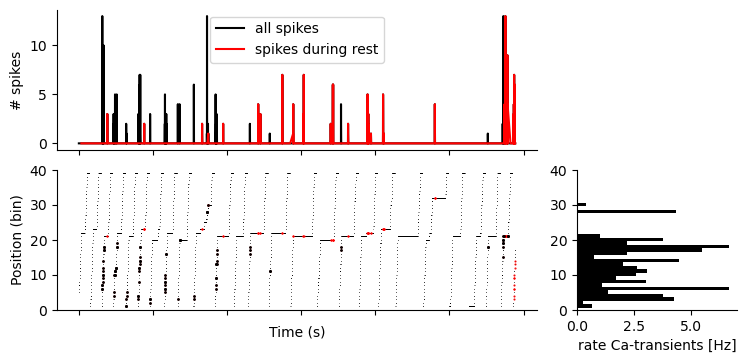

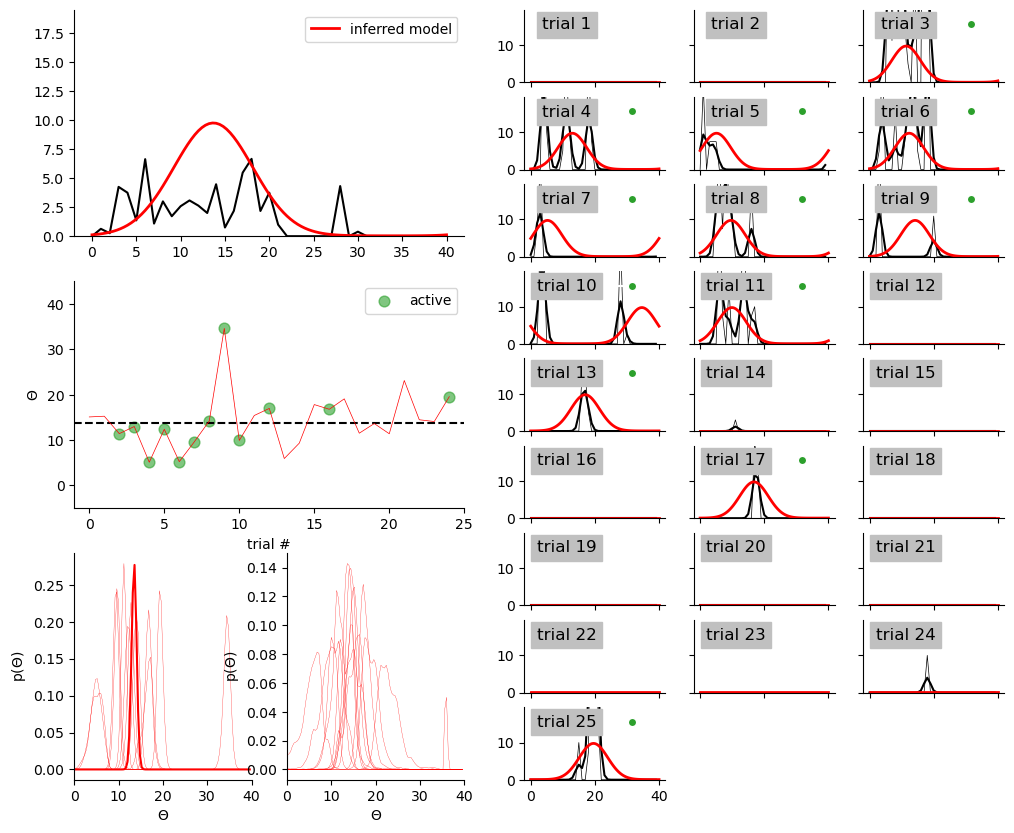

In [60]:
from placefield_detection.analyze_results import display_results
neuron=0
prepared_activity = prepare_activity(neuron_activity[neuron, :], behavior)
plot_activity(prepared_activity, behavior)
display_results(results,neuron)

In [207]:
from placefield_detection.analyze_results import build_results, handover_inference_results

mode_place_cell_detection=["peak", "information"]
mode_place_field_detection=["threshold", "bayesian"]
modes = mode_place_cell_detection + mode_place_field_detection
unique_modes = list(set(modes))

stacked_results = build_results(
    n_cells=len(results),
    nbin=behavior["nbin"],
    n_trials=behavior["trials"]["ct"],
    N_f=2,
    hierarchical=["theta"],
    modes=unique_modes,
)
stacked_results

for n, res in enumerate(results):
    # print(res)
    if res:
        stacked_results = handover_inference_results(
            res, stacked_results, n, excluded_keys=["x"]
        )

stacked_results["stability"] = stability_results

In [211]:
stacked_results

{'firingstats': {'firing_rate': array([0.84436534, 0.53565469, 0.56235399, 0.46056291, 0.84770275,
         0.65079542, 0.80264768, 1.02792302, 0.60073423, 1.16475693,
         0.36044054, 1.68873067, 1.03126043, 1.16141951, 0.32039159]),
  'map_rates': array([[ 0.        ,  0.63380282,  0.25423729,  4.25      ,  3.75      ,
           1.36363636,  6.63934426,  1.08695652,  3.        ,  1.72131148,
           2.5862069 ,  3.08219178,  2.63513514,  2.        ,  4.47761194,
           0.75      ,  2.18181818,  5.47619048,  6.66666667,  2.17391304,
           3.75      ,  0.9939759 ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  4.3220339 ,  0.        ,
           0.38961039,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.4918032

In [206]:
from placefield_detection.alternative_detection_methods import stability_method
stability_results = stability_method(
    behavior,
    neuron_activity[:, behavior["active"]],
    neurons=np.arange(15),  # specify neurons to analyze
)
stability_results

100%|██████████| 15/15 [00:00<00:00, 218.63it/s]


{'is_place_cell': array([False, False, False, False, False, False,  True,  True, False,
        False,  True, False, False, False, False]),
 'p_value': array([0.3956044 , 0.59770115, 0.06666667, 0.42857143, 0.05681818,
        0.3372093 , 0.03225806, 0.03333333, 0.44318182, 0.10227273,
        0.03370787, 0.21111111,        nan, 0.32967033,        nan])}

In [101]:
# stacked_results["threshold"]
for res in results:
    if res:
        res["threshold"]["fields"] = {
            "n_modes": res["threshold"]["n_modes"],
            "parameter": {
                "baseline": res["threshold"]["baseline"],
                "amplitude": res["threshold"]["amplitude"],
                "location": res["threshold"]["location"],
                "width": res["threshold"]["width"],
            },
        }
# results[0]["threshold"]

In [113]:
results[-1]["threshold"]

{'is_place_cell': True,
 'n_modes': 1,
 'baseline': 1e-06,
 'amplitude': [1.4147956027506832],
 'location': [15.634519555754313],
 'width': [9.062732514029207],
 'fields': {'n_modes': 1,
  'parameter': {'baseline': 1e-06,
   'amplitude': [1.4147956027506832],
   'location': [15.634519555754313],
   'width': [9.062732514029207]}}}

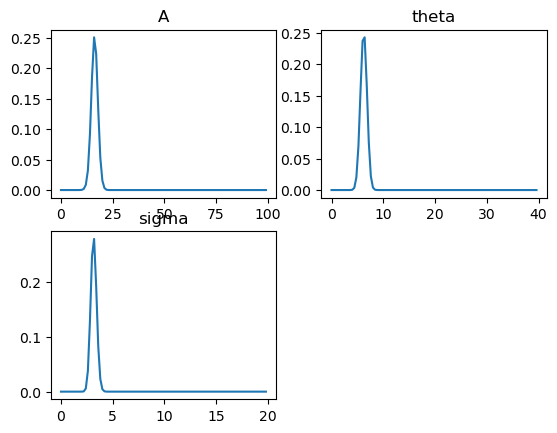

In [25]:
from matplotlib import pyplot as plt

fig = plt.figure()
for i, key in enumerate(["A", "theta", "sigma"], start=1):

    ax = fig.add_subplot(2, 2, i)
    ax.set_title(key)
    ax.plot(
        process_neuron.place_cell_results["bayesian"]["fields"]["x"][key][:-1],
        process_neuron.place_cell_results["bayesian"]["fields"]["p_x"]["global"][key][
            0, :
        ],
    )

[0. 0. 0. ... 0. 0. 0.]


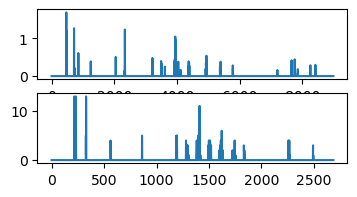

In [8]:
from placefield_detection.utils import prepare_activity
from placefield_detection.HierarchicalBayesInference import HierarchicalBayesInference
import logging

activity = neuron_activity[2, :]
processed_activity = prepare_activity(
    activity, behavior["active"], behavior["trials"], nbin
)
# print(activity)
# print(processed_activity["spike_map"])
hbm = HierarchicalBayesInference(
    processed_activity["spike_map"],
    behavior["trials"]["dwelltime"],
    logLevel=logging.ERROR,
)

# fig, axes = plt.subplots(2,1,figsize=(4,2))
# axes[0].plot(activity, "k", ms=0.5, label="raw activity")
# axes[1].plot(processed_activity['S'], "r", ms=0.5, label="raw activity")

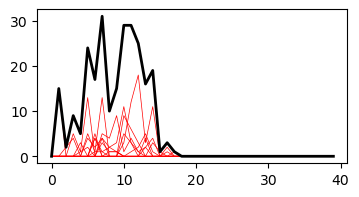

In [9]:
processed_activity["spike_map"].sum(axis=0)
plt.figure(figsize=(4, 2))
plt.plot(
    processed_activity["spike_map"].T, "r", ms=0.5, label="raw activity", linewidth=0.5
)
plt.plot(
    processed_activity["spike_map"].sum(axis=0),
    "k",
    ms=0.5,
    label="raw activity",
    linewidth=2,
)

In [10]:
import numpy as np

# hbm.set_priors(N_f=1, hierarchical_in=["theta"], wrap=["theta"])
hbm.set_priors(N_f=0, hierarchical_in=["theta"], wrap=["theta"])

from placefield_detection.analyze_results import build_inference_results

hbm.inference_results = build_inference_results(
    n_cells=1,
    N_f=2,
    nbin=40,
    mode="bayesian",
    n_trials=hbm.nSamples,
    hierarchical=hbm.hierarchical,
)

# my_prior_trafo = hbm.set_prior_transform(vectorized=True)
# my_likelihood = hbm.set_logp_func(vectorized=True, penalties=["overlap", "reliability"])

# p_test = np.random.rand(1, hbm.nParams)
# p_prior = my_prior_trafo(p_test)
# print("prior", p_prior)

# sampling_results = hbm.run_sampling(
#     penalties=["overlap", "reliability"],
#     improvement_loops=2,
#     show_status=True,
# )

In [11]:
from placefield_detection.analyze_results import build_results

hbm.inference_results = build_results(
    n_cells=1,
    nbin=40,
    n_trials=hbm.nSamples,
    modes=["bayesian"],
    N_f=2,
    hierarchical=hbm.hierarchical,
)

In [138]:
print("logp", my_likelihood(p_prior))

logp [-915.7210637]


In [ ]:
from placefield_detection.process_single_neuron import process_single_neuron
from dataclasses import dataclass


@dataclass
class parameter:
    nbin: int


param = parameter(40)

process_single_neuron = process_single_neuron(
    behavior,
    param,
    ["peak", "information"],
    ["bayesian"],
    plot_it=True,
)
# process_single_neuron.run_detection(neuron_activity[1, :])

In [ ]:
import numpy as np

is_PC = np.where(
    np.logical_and(
        results["status"]["is_place_cell"]["peak_method"],
        results["status"]["is_place_cell"]["information_method"],
    )
)
is_PC

(array([  0,   5,   6,  20,  39,  72,  74, 181, 250, 279, 291, 363, 366,
        371, 372, 414, 498, 519, 535, 546, 579, 583, 608, 665]),)

In [33]:
from unbiased_MI.estimate_unbiased_information import estimate_unbiased_information

Found 389/489 sufficiently active cells
subsample_size: [ 67.8 135.6 203.4 271.2 339.  406.8 474.6 542.4 610.2 678. ]
Computing information as a function of subsample size:
5000
2500
1667
1250
1000
834
715
625
556
500
times: (shuffle/SI/MI) 18.373093128204346 17.25553798675537 292.27102065086365


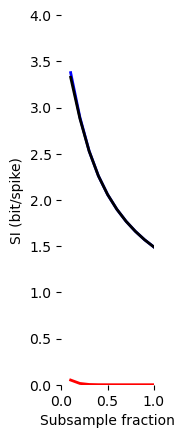

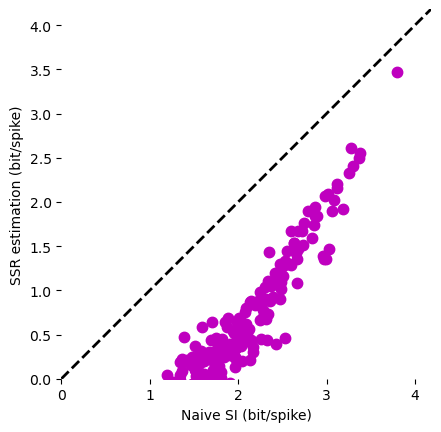

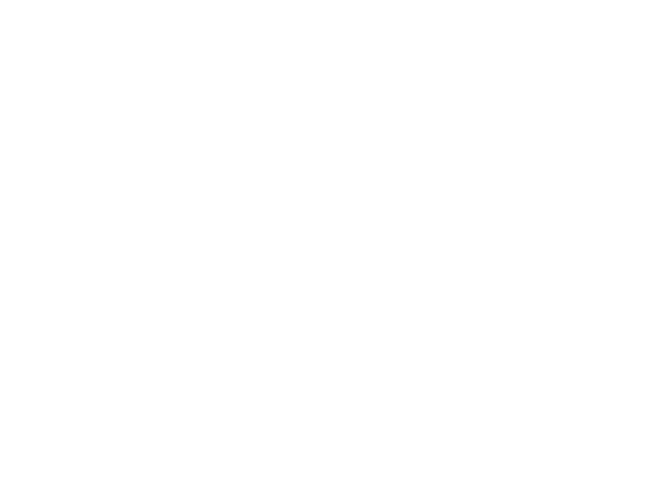

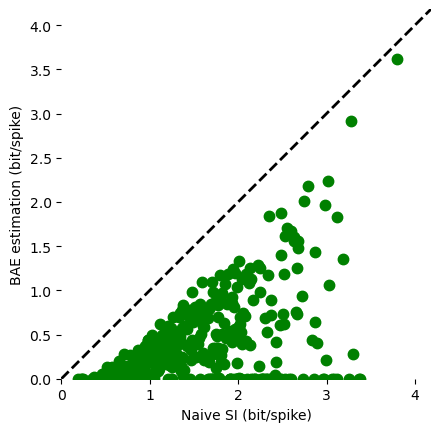

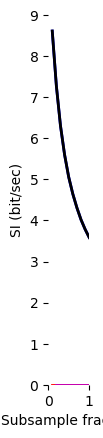

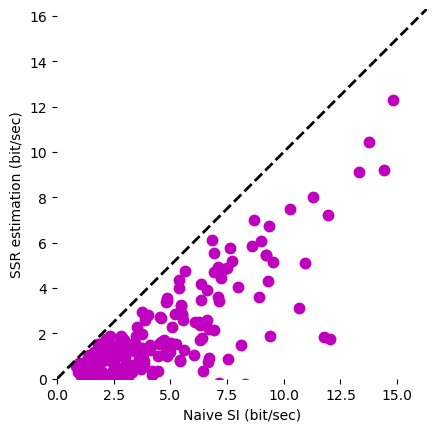

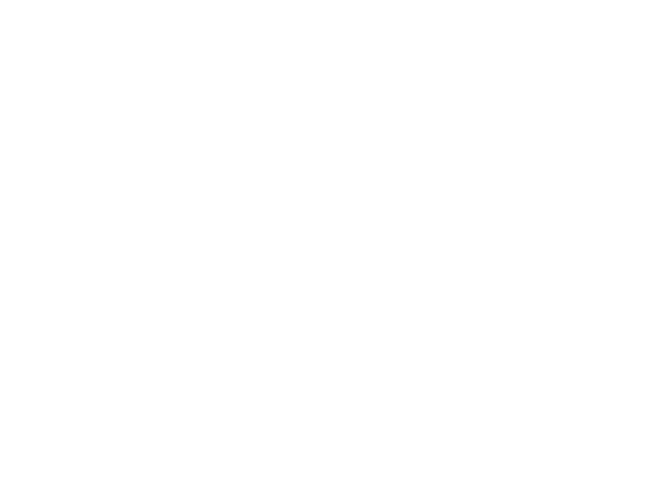

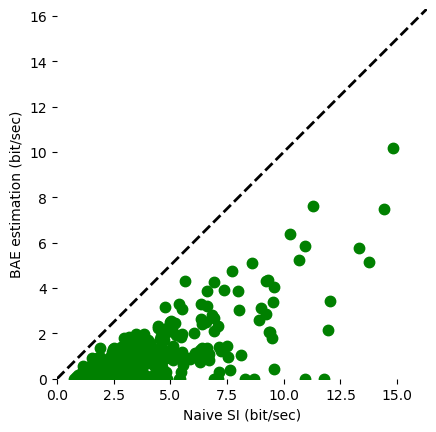

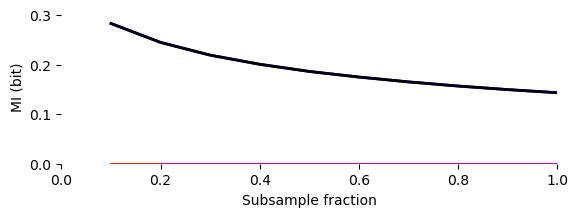

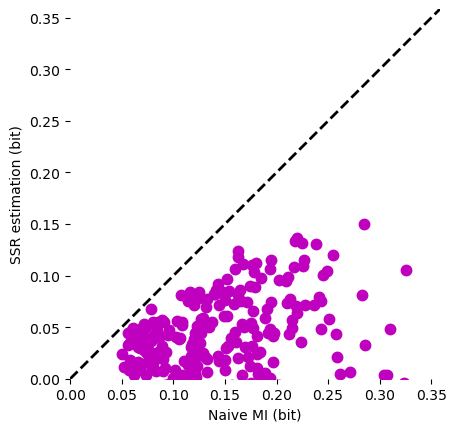

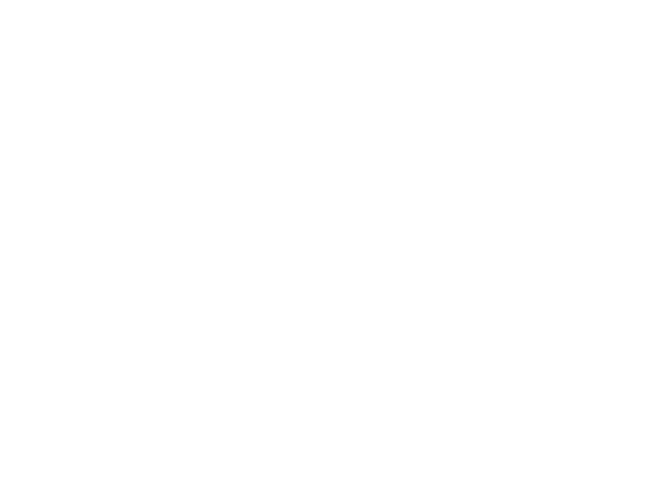

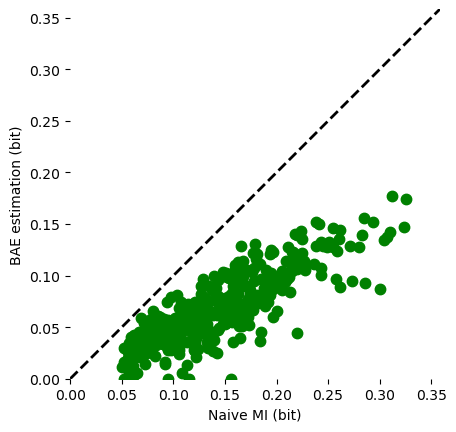

Finished analyzing data set


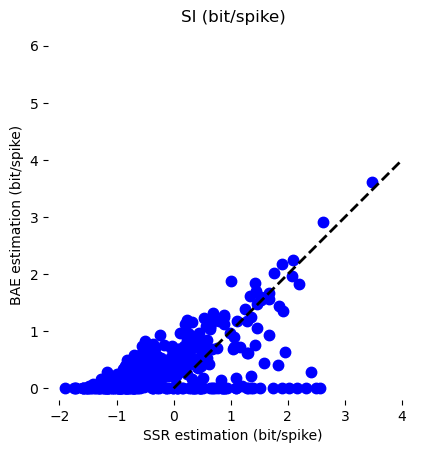

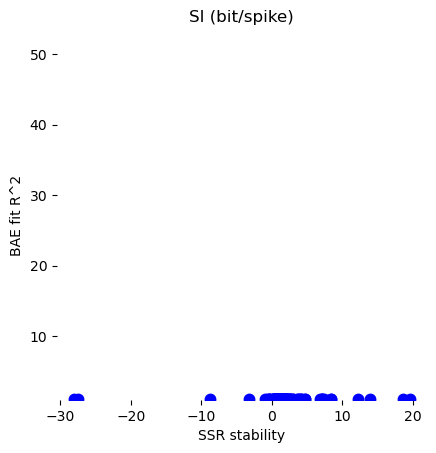

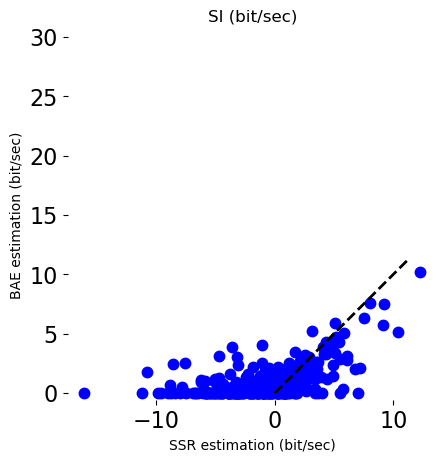

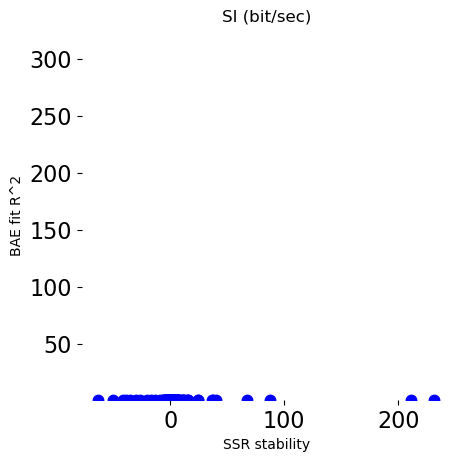

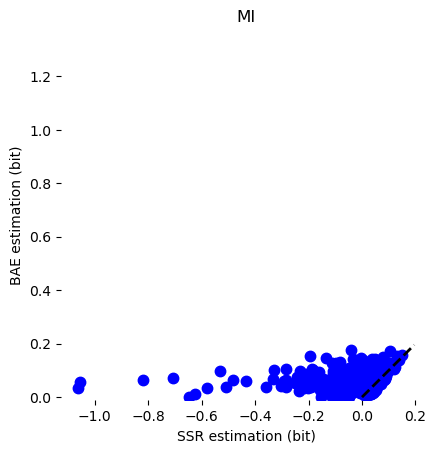

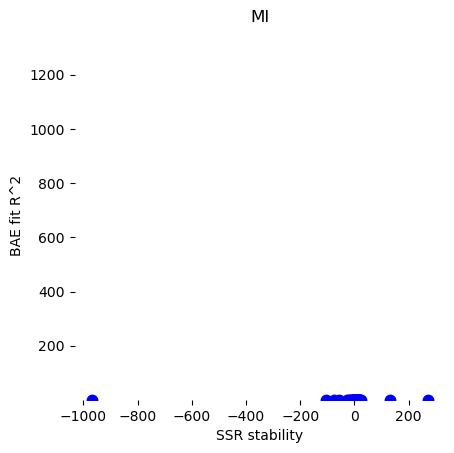

In [ ]:
results_unbias = estimate_unbiased_information(
    neuron_activity[:, behavior["active"]],
    behavior["binpos"],
)